In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

df = pd.read_csv('data/data.csv')

In [2]:

df = pd.read_csv('data/data.csv')

In [3]:
#Let's look at winning percentages...
blue_wins = sum(df['Winner'] == 'Blue')
red_wins = sum(df['Winner'] == 'Red')

In [4]:
print(blue_wins)
print(red_wins)

1591
3470


In [5]:
df.dtypes

R_fighter        object
B_fighter        object
Referee          object
date             object
location         object
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 145, dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.dtypes

R_fighter               object
B_fighter               object
Referee                 object
date            datetime64[ns]
location                object
                     ...      
R_Height_cms           float64
R_Reach_cms            float64
R_Weight_lbs           float64
B_age                  float64
R_age                  float64
Length: 145, dtype: object

In [55]:
df_recent = df.loc[df['date'] >'01/03/2010']
df_old = df.loc[df['date'] <'01/04/2010']


In [56]:
blue_wins_recent = sum(df_recent['Winner'] == 'Blue')
red_wins_recent = sum(df_recent['Winner'] == 'Red')
blue_wins_old = sum(df_old['Winner'] == 'Blue')
red_wins_old = sum(df_old['Winner'] == 'Red')


In [57]:
print(blue_wins_recent)
print(red_wins_recent)
print(blue_wins_old)
print(red_wins_old)

1591
2228
0
1242


([<matplotlib.axis.XTick at 0x24a554aecc8>,
 <a list of 2 Text xticklabel objects>)

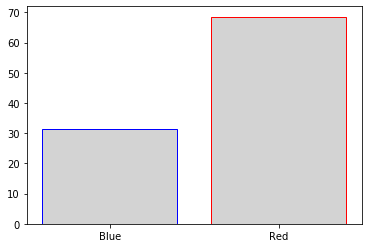

In [11]:
x_labels = ('Blue', 'Red')
y_pos = np.arange(len(x_labels))
wins = ((blue_wins / (blue_wins + red_wins))*100, (red_wins / (blue_wins + red_wins))*100)
plt.bar(y_pos, wins, align='center', edgecolor=['blue', 'red'], color='lightgrey')
plt.xticks(y_pos, x_labels)

([<matplotlib.axis.XTick at 0x24a567e70c8>,
 <a list of 2 Text xticklabel objects>)

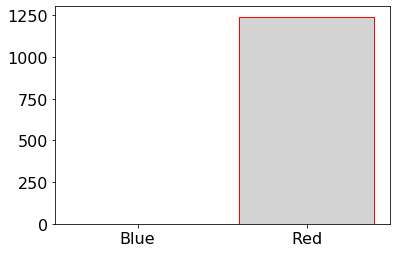

In [58]:
x_labels = ('Blue', 'Red')
y_pos = np.arange(len(x_labels))
wins = (blue_wins_old, red_wins_old)
plt.bar(y_pos, wins, align='center', edgecolor=['blue', 'red'], color='lightgrey')
plt.xticks(y_pos, x_labels)

([<matplotlib.axis.XTick at 0x24a5600cbc8>,
 <a list of 2 Text xticklabel objects>)

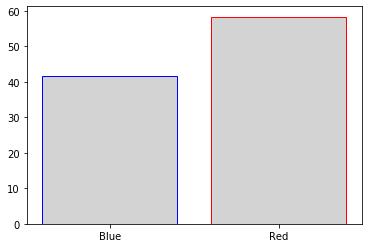

In [12]:
x_labels = ('Blue', 'Red') 
y_pos = np.arange(len(x_labels)) 
wins = ((blue_wins_recent / (blue_wins_recent + red_wins_recent))*100, (red_wins_recent / (blue_wins_recent + red_wins_recent))*100) 
plt.bar(y_pos, wins, align='center', edgecolor=['blue', 'red'], color='lightgrey') 
plt.xticks(y_pos, x_labels)

x_labels = ('Blue', 'Red')
y_pos = np.arange(len(x_labels))
wins = ((blue_wins_recent / (blue_wins_recent + red_wins_recent))*100, (red_wins_recent / (blue_wins_recent + red_wins_recent))*100)
plt.bar(y_pos, wins, align='center', edgecolor=['blue', 'red'], color='lightgrey')
plt.xticks(y_pos, x_labels)

In [13]:
#Lets deal with missing data...
missing=(df.isnull().sum() / len(df)) * 100
missing = pd.DataFrame({'missing-ratio' :missing})
missing['feature'] = missing.index
over_10 = missing[missing['missing-ratio'] > 10]

remove_features = over_10['feature'].tolist()

In [14]:
#Remove features with over 10% missing
df_filtered = df.drop(remove_features, axis=1)

In [15]:
df.shape

(5144, 145)

In [16]:
f_missing=(df_filtered.isnull().sum() / len(df_filtered)) * 100
f_missing = pd.DataFrame({'missing-ratio' :f_missing})
f_missing['feature'] = f_missing.index
f_missing = f_missing[f_missing['missing-ratio'] > 0]
display(f_missing)



,missing-ratio,feature
Referee,0.447123,Referee
B_Stance,3.090980,B_Stance
B_Height_cms,0.155521,B_Height_cms
B_Weight_lbs,0.116641,B_Weight_lbs
R_Stance,2.604977,R_Stance
R_Height_cms,0.077760,R_Height_cms
R_Reach_cms,6.143079,R_Reach_cms
R_Weight_lbs,0.058320,R_Weight_lbs
B_age,3.343701,B_age
R_age,1.244168,R_age


In [17]:
df_filtered['Referee'] = df_filtered['Referee'].fillna('Unknown')
df_filtered['B_Stance'] = df_filtered['B_Stance'].fillna('Orthodox')
df_filtered['R_Stance'] = df_filtered['R_Stance'].fillna('Orthodox')
df_filtered['R_Height_cms'] = df_filtered['R_Height_cms'].fillna((df_filtered['R_Height_cms'].mean()))
df_filtered['B_Height_cms'] = df_filtered['B_Height_cms'].fillna((df_filtered['B_Height_cms'].mean()))
df_filtered['B_Weight_lbs'] = df_filtered['B_Weight_lbs'].fillna((df_filtered['B_Weight_lbs'].mean()))
df_filtered['R_Reach_cms'] = df_filtered['R_Reach_cms'].fillna((df_filtered['R_Reach_cms'].mean()))
df_filtered['R_Weight_lbs'] = df_filtered['R_Weight_lbs'].fillna((df_filtered['R_Weight_lbs'].mean()))
df_filtered['B_age'] = df_filtered['B_age'].fillna((df_filtered['B_age'].mean()))
df_filtered['R_age'] = df_filtered['R_age'].fillna((df_filtered['R_age'].mean()))




In [18]:
f_missing=(df_filtered.isnull().sum() / len(df_filtered)) * 100
f_missing = pd.DataFrame({'missing-ratio' :f_missing})
f_missing['feature'] = f_missing.index
f_missing = f_missing[f_missing['missing-ratio'] > 0]
display(f_missing)

,missing-ratio,feature


In [19]:
df_filtered.describe()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,5144.000000,5144.000000,5144.000000,5144.0,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,...,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000
mean,3.119362,0.429821,0.837286,0.0,1.588453,1.463647,8.920879,0.279938,0.016913,0.212286,...,1.177294,1.254860,0.777605,0.071345,3.598173,179.274089,183.664412,172.075861,29.171963,29.442323
std,0.631457,0.731325,1.306203,0.0,1.785490,1.866391,11.269340,1.116480,0.130457,0.526598,...,1.600135,1.801056,1.326056,0.277771,3.709519,8.635618,9.982792,35.153817,4.009758,4.116075
min,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,172.720000,177.800000,145.000000,26.000000,26.000000
50%,3.000000,0.000000,0.000000,0.0,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,2.000000,180.340000,183.664412,170.000000,29.000000,29.000000
75%,3.000000,1.000000,1.000000,0.0,2.000000,2.000000,13.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,1.000000,0.000000,5.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,6.000000,13.000000,0.0,16.000000,13.000000,75.000000,16.000000,2.000000,5.000000,...,10.000000,11.000000,13.000000,2.000000,20.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [20]:
#Remove R_fighter, B_fighter, Referee, and Draws


df_filtered

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.560000,135.0,31.000000,32.000000
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.640000,125.0,32.000000,31.000000
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.040000,155.0,36.000000,35.000000
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.720000,135.0,26.000000,29.000000
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.500000,264.0,32.000000,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,1.0,0.0,0.0,1.0,Orthodox,195.58,183.664412,216.0,29.171963,34.000000
5140,Ken Shamrock,Patrick Smith,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Orthodox,185.42,182.880000,205.0,30.000000,29.000000
5141,Royce Gracie,Art Jimmerson,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Southpaw,185.42,183.664412,175.0,30.000000,26.000000
5142,Kevin Rosier,Zane Frazier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Orthodox,193.04,183.664412,275.0,29.171963,29.442323


In [21]:
to_drop = ['R_fighter', 'B_fighter', 'Referee']
df_filtered.drop(to_drop, axis=1, inplace=True)

In [22]:
df_filtered

,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,4.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.560000,135.0,31.000000,32.000000
1,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,3.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.640000,125.0,32.000000,31.000000
2,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,3.0,0.0,8.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.040000,155.0,36.000000,35.000000
3,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,4.0,0.0,4.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.720000,135.0,26.000000,29.000000
4,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,1.0,0.0,1.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.500000,264.0,32.000000,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,Orthodox,195.58,183.664412,216.0,29.171963,34.000000
5140,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Orthodox,185.42,182.880000,205.0,30.000000,29.000000
5141,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Southpaw,185.42,183.664412,175.0,30.000000,26.000000
5142,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Orthodox,193.04,183.664412,275.0,29.171963,29.442323


In [23]:
df_filtered = df_filtered[df_filtered.Winner != 'Draw']

In [24]:
df_filtered

,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,4.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.560000,135.0,31.000000,32.000000
1,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,3.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.640000,125.0,32.000000,31.000000
2,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,3.0,0.0,8.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.040000,155.0,36.000000,35.000000
3,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,4.0,0.0,4.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.720000,135.0,26.000000,29.000000
4,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,1.0,0.0,1.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.500000,264.0,32.000000,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,Orthodox,195.58,183.664412,216.0,29.171963,34.000000
5140,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Orthodox,185.42,182.880000,205.0,30.000000,29.000000
5141,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Southpaw,185.42,183.664412,175.0,30.000000,26.000000
5142,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Orthodox,193.04,183.664412,275.0,29.171963,29.442323


In [25]:
    df_filtered["Winner"] = df_filtered["Winner"].astype('category')
    df_filtered["label"] = df_filtered["Winner"].cat.codes

In [26]:
df_filtered

,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,label
0,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,4.0,...,0.0,0.0,8.0,Orthodox,162.56,162.560000,135.0,31.000000,32.000000,1
1,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,3.0,...,2.0,0.0,5.0,Southpaw,165.10,167.640000,125.0,32.000000,31.000000,1
2,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,3.0,0.0,8.0,...,6.0,1.0,14.0,Orthodox,180.34,193.040000,155.0,36.000000,35.000000,1
3,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,4.0,0.0,4.0,...,0.0,0.0,6.0,Orthodox,162.56,172.720000,135.0,26.000000,29.000000,0
4,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,1.0,0.0,1.0,...,0.0,0.0,3.0,Southpaw,187.96,190.500000,264.0,32.000000,26.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,Orthodox,195.58,183.664412,216.0,29.171963,34.000000,1
5140,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Orthodox,185.42,182.880000,205.0,30.000000,29.000000,1
5141,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Southpaw,185.42,183.664412,175.0,30.000000,26.000000,1
5142,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Orthodox,193.04,183.664412,275.0,29.171963,29.442323,1


In [27]:
df_total = df_filtered
y_total = df_total["label"]

In [28]:
#Let's make the test_set
df_test = df_total.loc[df_total['date'] >'11/11/2018']
y_test = df_test['label']

#Let's make the total train set
total_train = df_total.loc[df_total['date'] <'11/12/2018']
total_train_y = total_train['label']

#Let's make the recent train set
recent_train = total_train.loc[total_train['date']>'01/03/2010']
recent_train_y = recent_train['label']

In [29]:
#Lets remove the date, winner, and label from the training sets....
final_drop = ['date', 'Winner', 'label']
df_test.drop(final_drop, axis=1, inplace=True)
total_train.drop(final_drop, axis=1, inplace=True)
recent_train.drop(final_drop, axis=1, inplace=True)


In [30]:
def run_model(X_train, y_train, X_test, y_test, model):
    #dummify and model
    X_test = pd.get_dummies(X_test)
    X_train = pd.get_dummies(X_train)
    X_train, X_test = X_train.align(X_test, join='left', axis=1)
    X_test.fillna(value=0, inplace=True)
    X_train.fillna(value=0, inplace=True)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)    
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    class_names = ['Blue', 'Red']
    
    titles_options= [(f"Total Confusion matrix", None),
                     ("Normalized confusion matrix", 'true')]
    
    title = f"Confusion matrix"
    normalize=None
    
    
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                 values_format='.5g'
                                 )
    disp.ax_.set_title(title)
    plt.rcParams.update({'font.size': 16})
    print(title)
    print(disp.confusion_matrix)
    plt.grid(False)
    plt.show()    
    cm = confusion_matrix(predictions, y_test)
    tp = cm[0][0] 
    tn = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    total = tp + tn + fp + fn
    print(f"tp for total: {tp}")
    print(f"tn: {tn}")
    print(f"fp: {fp}")
    print(f"fn: {fn}")
    accuracy = (tp + tn) / total
    precision = tp / (tp + fp)
    #***I think that True Positive Rate may be the indicator of a good
    #model....
    true_positive = tp / (tp + fn)
    print(f"The precision is: {precision}")
    print(f"The accuracy is {accuracy}")
    print(f"The prevalence of blue is {(tp + fn) / total}")
    print(f"The true_positive rate for total is {true_positive}")

Confusion matrix
[[ 49 104]
 [ 36 120]]


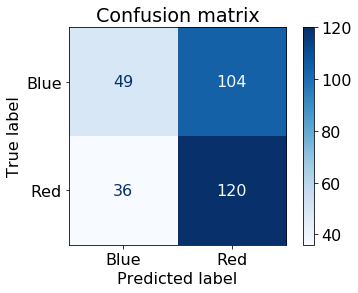

tp for total: 49
tn: 120
fp: 36
fn: 104
The precision is: 0.5764705882352941
The accuracy is 0.5469255663430421
The prevalence of blue is 0.49514563106796117
The true_positive rate for total is 0.3202614379084967


In [44]:
run_model(total_train, total_train_y, df_test, y_test, LogisticRegression())

Confusion matrix
[[ 61  92]
 [ 36 120]]


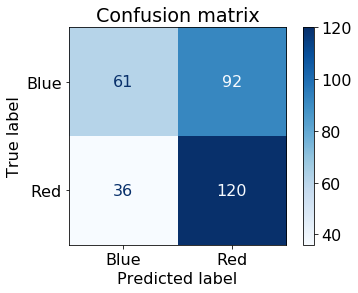

tp for total: 61
tn: 120
fp: 36
fn: 92
The precision is: 0.6288659793814433
The accuracy is 0.5857605177993528
The prevalence of blue is 0.49514563106796117
The true_positive rate for total is 0.39869281045751637


In [43]:
run_model(recent_train, recent_train_y, df_test, y_test, LogisticRegression())

Confusion matrix
[[ 27 126]
 [ 21 135]]


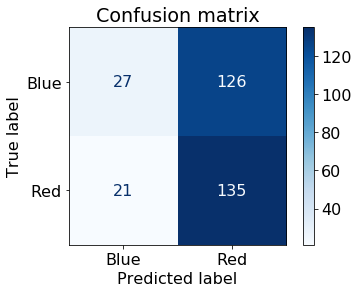

tp for total: 27
tn: 135
fp: 21
fn: 126
The precision is: 0.5625
The accuracy is 0.5242718446601942
The prevalence of blue is 0.49514563106796117
The true_positive rate for total is 0.17647058823529413


In [46]:
run_model(total_train, total_train_y, df_test, y_test, RandomForestClassifier())

Confusion matrix
[[ 45 108]
 [ 33 123]]


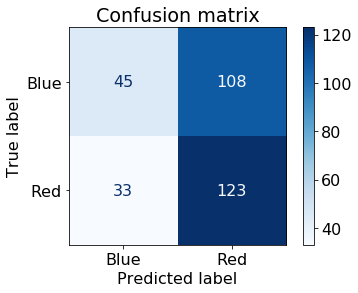

tp for total: 45
tn: 123
fp: 33
fn: 108
The precision is: 0.5769230769230769
The accuracy is 0.5436893203883495
The prevalence of blue is 0.49514563106796117
The true_positive rate for total is 0.29411764705882354


In [48]:
run_model(recent_train, recent_train_y, df_test, y_test, RandomForestClassifier())

Confusion matrix
[[65 88]
 [69 87]]


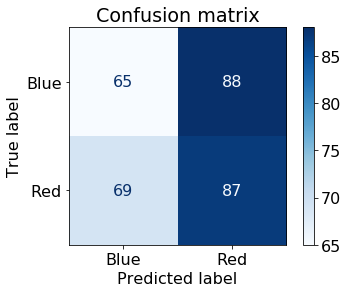

tp for total: 65
tn: 87
fp: 69
fn: 88
The precision is: 0.48507462686567165
The accuracy is 0.4919093851132686
The prevalence of blue is 0.49514563106796117
The true_positive rate for total is 0.42483660130718953


In [50]:
run_model(total_train, total_train_y, df_test, y_test, DecisionTreeClassifier())

Confusion matrix
[[ 65  88]
 [ 54 102]]


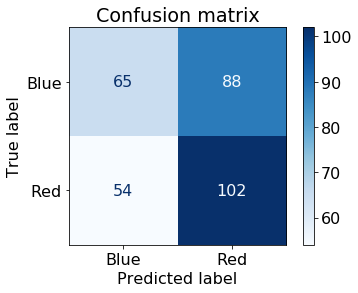

tp for total: 65
tn: 102
fp: 54
fn: 88
The precision is: 0.5462184873949579
The accuracy is 0.540453074433657
The prevalence of blue is 0.49514563106796117
The true_positive rate for total is 0.42483660130718953


In [51]:
run_model(recent_train, recent_train_y, df_test, y_test, DecisionTreeClassifier())

In [33]:
#dummify and model
X_test = pd.get_dummies(df_test)
X = pd.get_dummies(total_train)
X, X_test = X.align(X_test, join='left', axis=1)
X_test.fillna(value=0, inplace=True)
X.fillna(value=0, inplace=True)
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [34]:
model = LogisticRegression()
model.fit(X, total_train_y)
predictions = model.predict(X_test)

In [35]:
predictions

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

Confusion matrix
[[ 49 104]
 [ 36 120]]


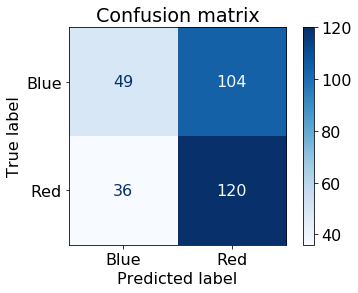

In [36]:
    class_names = ['Blue', 'Red']
    
    titles_options= [(f"Total Confusion matrix", None),
                     ("Normalized confusion matrix", 'true')]
    
    title = f"Confusion matrix"
    normalize=None
    
    
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                 values_format='.5g'
                                 )
    disp.ax_.set_title(title)
    plt.rcParams.update({'font.size': 16})
    print(title)
    print(disp.confusion_matrix)
    plt.grid(False)
    plt.show()


In [37]:
    cm = confusion_matrix(predictions, y_test)
    tp = cm[0][0] 
    tn = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    total = tp + tn + fp + fn
    print(f"tp for total: {tp}")
    print(f"tn: {tn}")
    print(f"fp: {fp}")
    print(f"fn: {fn}")
    accuracy = (tp + tn) / total
    precision = tp / (tp + fp)
    #***I think that True Positive Rate may be the indicator of a good
    #model....
    true_positive = tp / (tp + fn)
    print(f"The precision is: {precision}")
    print(f"The accuracy is {accuracy}")
    print(f"The prevalence of blue is {(tp + fn) / total}")
    print(f"The true_positive rate for total is {true_positive}")
    

tp for total: 49
tn: 120
fp: 36
fn: 104
The precision is: 0.5764705882352941
The accuracy is 0.5469255663430421
The prevalence of blue is 0.49514563106796117
The true_positive rate for total is 0.3202614379084967


In [38]:
#dummify and model
X_test = pd.get_dummies(df_test)
X = pd.get_dummies(recent_train)
X, X_test = X.align(X_test, join='left', axis=1)
X_test.fillna(value=0, inplace=True)
X.fillna(value=0, inplace=True)
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

In [39]:
model = LogisticRegression()
model.fit(X, recent_train_y)
predictions = model.predict(X_test)

In [40]:
predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Confusion matrix
[[ 61  92]
 [ 36 120]]


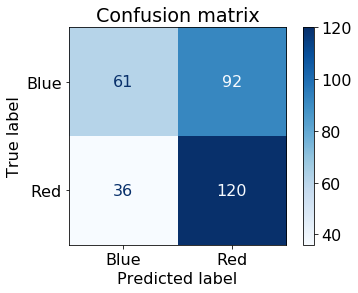

In [41]:
    class_names = ['Blue', 'Red']
    
    titles_options= [(f"Total Confusion matrix", None),
                     ("Normalized confusion matrix", 'true')]
    
    title = f"Confusion matrix"
    normalize=None
    
    
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                 values_format='.5g'
                                 )
    disp.ax_.set_title(title)
    plt.rcParams.update({'font.size': 16})
    print(title)
    print(disp.confusion_matrix)
    plt.grid(False)
    plt.show()

In [42]:
    cm = confusion_matrix(predictions, y_test)
    tp = cm[0][0] 
    tn = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    total = tp + tn + fp + fn
    print(f"tp for total: {tp}")
    print(f"tn: {tn}")
    print(f"fp: {fp}")
    print(f"fn: {fn}")
    accuracy = (tp + tn) / total
    precision = tp / (tp + fp)
    #***I think that True Positive Rate may be the indicator of a good
    #model....
    true_positive = tp / (tp + fn)
    print(f"The precision is: {precision}")
    print(f"The accuracy is {accuracy}")
    print(f"The prevalence of blue is {(tp + fn) / total}")
    print(f"The true_positive rate for total is {true_positive}")
    

tp for total: 61
tn: 120
fp: 36
fn: 92
The precision is: 0.6288659793814433
The accuracy is 0.5857605177993528
The prevalence of blue is 0.49514563106796117
The true_positive rate for total is 0.39869281045751637
